✅ Successfully created synthetic dataset: Mall_Customers.csv

--- Dataset Preview ---
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   49                  26                      29
1           2  Female   56                  25                      32
2           3    Male   66                  23                      38
3           4    Male   69                  28                      20
4           5    Male   49                  19                      27

--- Calculating Optimal Clusters (Elbow Method) ---


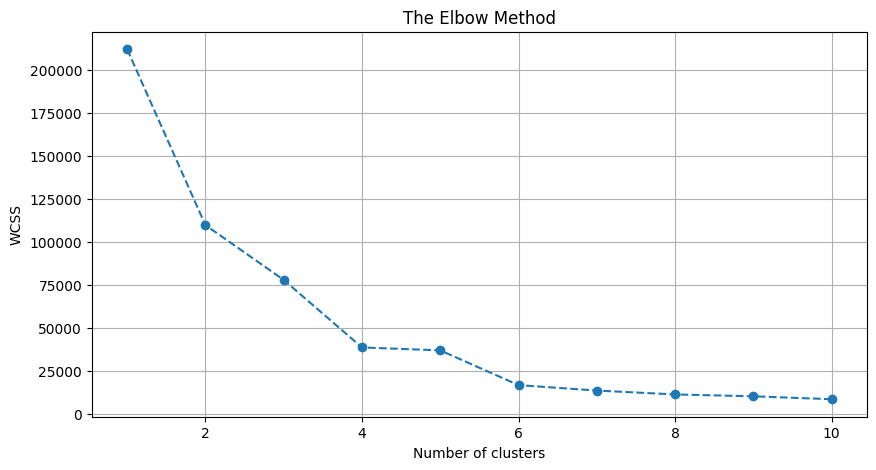

Based on the Elbow Plot, we choose K=5 as the optimal number of clusters.


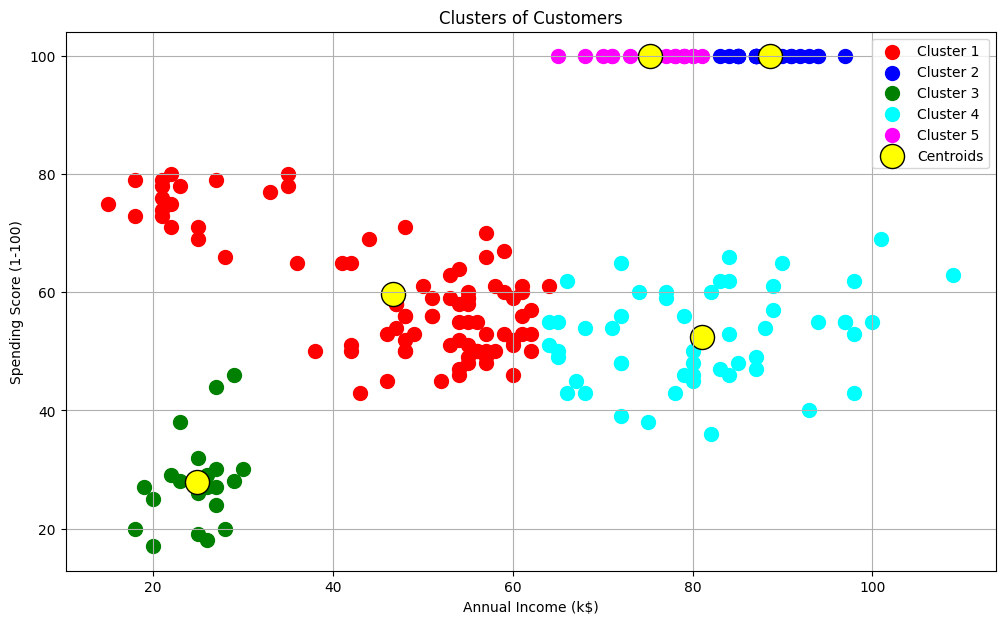


✅ Analysis Complete. Two plots generated.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import os

# ==========================================
# PART 1: Generate Synthetic Kaggle-like Dataset
# ==========================================
def create_mall_customers_csv(filename='Mall_Customers.csv'):
    """
    Creates a synthetic dataset mimics the structure of the popular
    'Mall Customer Segmentation Data' on Kaggle.
    """
    np.random.seed(42)
    n_samples = 200

    # 1. Customer IDs
    customer_ids = np.arange(1, n_samples + 1)

    # 2. Gender (Random distribution)
    genders = np.random.choice(['Male', 'Female'], size=n_samples)

    # 3. Age (Random integers between 18 and 70)
    ages = np.random.randint(18, 70, size=n_samples)

    # 4. create Income and Spending Score with specific clusters to mimic real data
    # The real dataset typically has 5 distinct groups

    # Cluster 1: Low Income, Low Spending
    X1 = np.random.normal(25, 5, (20, 2))
    # Cluster 2: Low Income, High Spending
    X2 = np.random.normal(25, 5, (20, 2)) + np.array([0, 50])
    # Cluster 3: Medium Income, Medium Spending
    X3 = np.random.normal(55, 8, (80, 2))
    # Cluster 4: High Income, Low Spending
    X4 = np.random.normal(85, 8, (40, 2)) + np.array([0, -30])
    # Cluster 5: High Income, High Spending
    X5 = np.random.normal(85, 8, (40, 2)) + np.array([0, 30])

    # Adjusting means to align with typical 'Annual Income' vs 'Spending Score' scale
    # Income roughly 15-137k, Score 1-100
    X1[:, 1] += 0   # Base
    X2[:, 1] += 0   # Base
    X3[:, 1] += 0   # Base

    # Concatenate and formatting
    X = np.vstack([X1, X2, X3, X4, X5])

    # Ensure values are within logical bounds
    income = np.clip(X[:, 0], 15, 137).astype(int)
    score = np.clip(X[:, 1], 1, 100).astype(int)

    # Create DataFrame
    data = {
        'CustomerID': customer_ids,
        'Gender': genders,
        'Age': ages,
        'Annual Income (k$)': income,
        'Spending Score (1-100)': score
    }

    df = pd.DataFrame(data)

    # Save to CSV
    if not os.path.exists(filename):
        df.to_csv(filename, index=False)
        print(f"✅ Successfully created synthetic dataset: {filename}")
    else:
        print(f"ℹ️ File {filename} already exists. Using existing file.")

    return df

# ==========================================
# PART 2: K-Means Clustering Analysis
# ==========================================

def perform_kmeans_analysis():
    # 1. Load Data
    # In a real scenario, you would just use: df = pd.read_csv('Mall_Customers.csv')
    df = create_mall_customers_csv()

    print("\n--- Dataset Preview ---")
    print(df.head())

    # 2. Select Features
    # We use Annual Income and Spending Score for 2D clustering
    X = df.iloc[:, [3, 4]].values

    # 3. Determine Optimal K (The Elbow Method)
    print("\n--- Calculating Optimal Clusters (Elbow Method) ---")
    wcss = [] # Within-Cluster Sum of Square
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    # Plot Elbow Graph
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.grid(True)
    plt.show()

    print("Based on the Elbow Plot, we choose K=5 as the optimal number of clusters.")

    # 4. Train K-Means Model
    optimal_k = 5
    kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(X)

    # 5. Visualizing the Clusters
    plt.figure(figsize=(12, 7))

    # Plot each cluster with a different color
    colors = ['red', 'blue', 'green', 'cyan', 'magenta']
    labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']

    for i in range(optimal_k):
        plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1],
                    s=100, c=colors[i], label=labels[i])

    # Plot Centroids
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                s=300, c='yellow', label='Centroids', edgecolors='black')

    plt.title('Clusters of Customers')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend()
    plt.grid(True)
    plt.show()

    print("\n✅ Analysis Complete. Two plots generated.")

if __name__ == "__main__":
    perform_kmeans_analysis()